In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Training Time

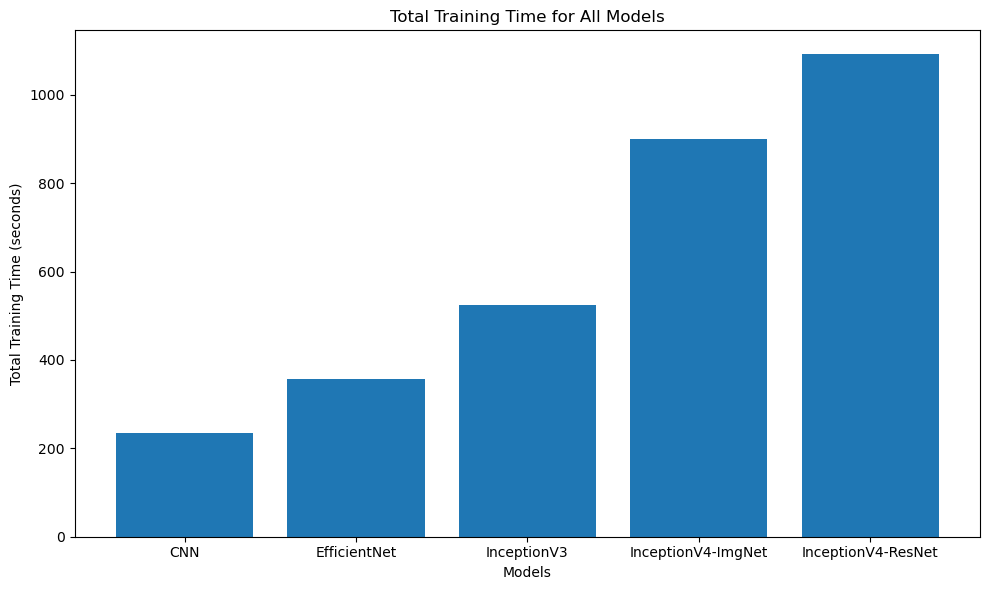

In [79]:
# Load CSV files
cnn_history = pd.read_csv('training_results/CNN_history.csv')
efficientnet_history = pd.read_csv('training_results/EfficientNet_history.csv')
inceptionv3_history = pd.read_csv('training_results/Inception_v3_history.csv')
inceptionv4_ImgNet_history = pd.read_csv('training_results/Inception_v4_ImageNet_history.csv')
inceptionv4_ResNet_history = pd.read_csv('training_results/Inception_v4_Resnet_v2_history.csv')

# Extract the time from the last row
cnn_time = cnn_history['Train Loss'].iloc[-1]
efficientnet_time = efficientnet_history['Train Loss'].iloc[-1]
inceptionv3_time = inceptionv3_history['Train Loss'].iloc[-1]
inceptionv4_ImgNet_time = inceptionv4_ImgNet_history['Train Loss'].iloc[-1]
inceptionv4_ResNet_time = inceptionv4_ResNet_history['Train Loss'].iloc[-1]

# Model names
models = ['CNN', 'EfficientNet', 'InceptionV3', 'InceptionV4-ImgNet', 'InceptionV4-ResNet']

# Corresponding total training times
times = [cnn_time, efficientnet_time, inceptionv3_time, inceptionv4_ImgNet_time, inceptionv4_ResNet_time]

# Create a bar plot of the total training times
plt.figure(figsize=(10, 6))
plt.bar(models, times)
plt.xlabel('Models')
plt.ylabel('Total Training Time (seconds)')
plt.title('Total Training Time for All Models')
plt.tight_layout()
plt.show()

Loss and Accuracy Curves

In [80]:
# Remove the last row 'Total Time' if it exists
cnn_history = cnn_history[cnn_history['Epoch'] != 'Total Time']
efficientnet_history = efficientnet_history[efficientnet_history['Epoch'] != 'Total Time']
inceptionv3_history = inceptionv3_history[inceptionv3_history['Epoch'] != 'Total Time']
inceptionv4_ImgNet_history = inceptionv4_ImgNet_history[inceptionv4_ImgNet_history['Epoch'] != 'Total Time']
inceptionv4_ResNet_history = inceptionv4_ResNet_history[inceptionv4_ResNet_history['Epoch'] != 'Total Time']

# Convert relevant columns to numeric
def convert_columns_to_numeric(df):
    df['Epoch'] = pd.to_numeric(df['Epoch'])
    df['Train Loss'] = pd.to_numeric(df['Train Loss'])
    df['Val Loss'] = pd.to_numeric(df['Val Loss'])
    df['Train Acc'] = pd.to_numeric(df['Train Acc'])
    df['Val Acc'] = pd.to_numeric(df['Val Acc'])

# Apply conversion to all datasets
convert_columns_to_numeric(cnn_history)
convert_columns_to_numeric(efficientnet_history)
convert_columns_to_numeric(inceptionv3_history)
convert_columns_to_numeric(inceptionv4_ImgNet_history)
convert_columns_to_numeric(inceptionv4_ResNet_history)


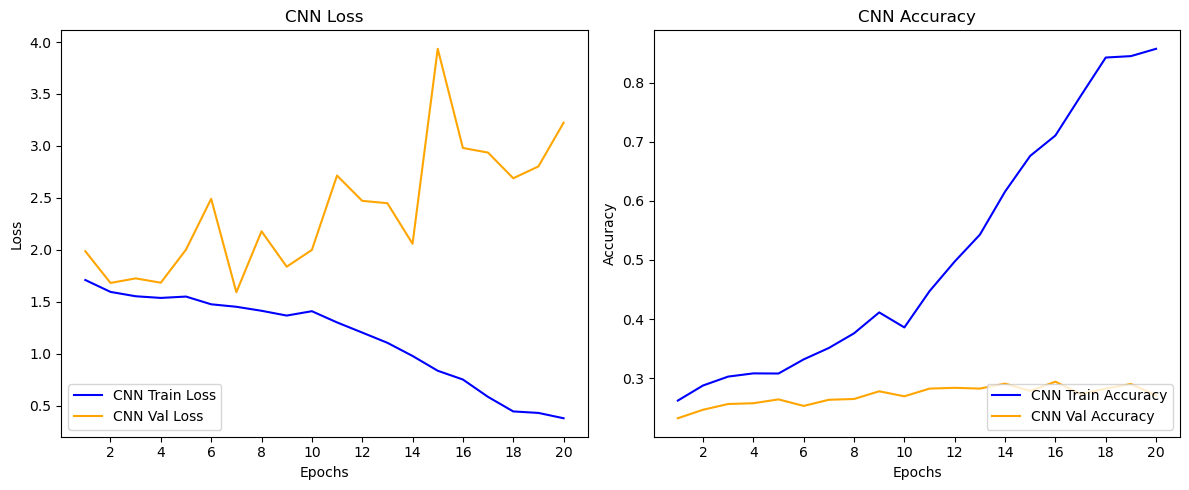

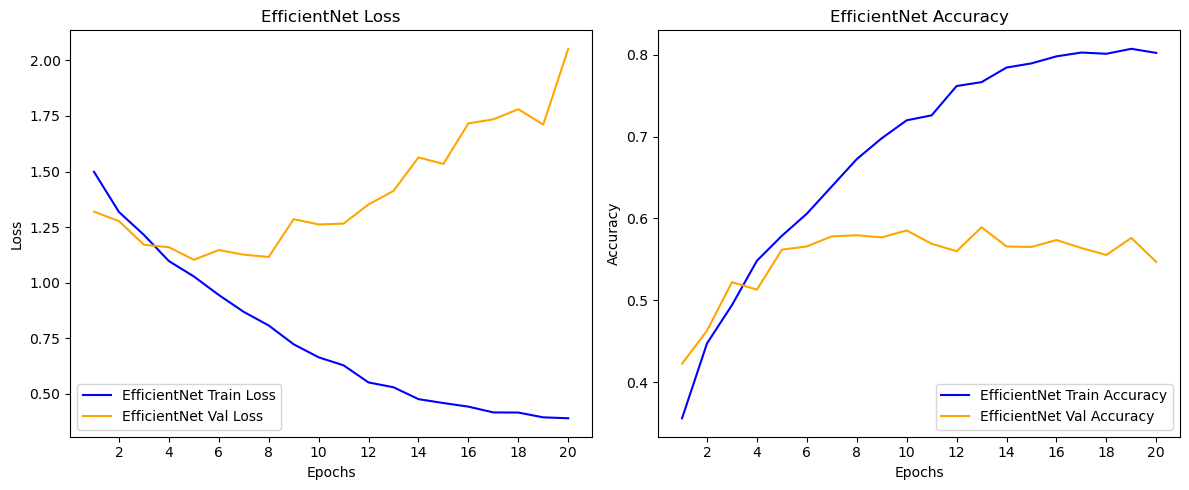

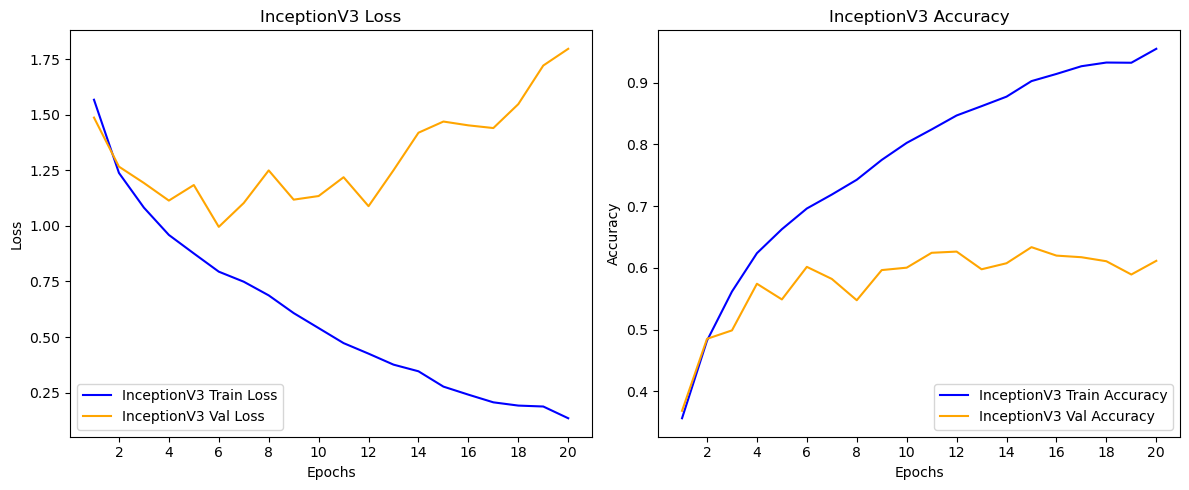

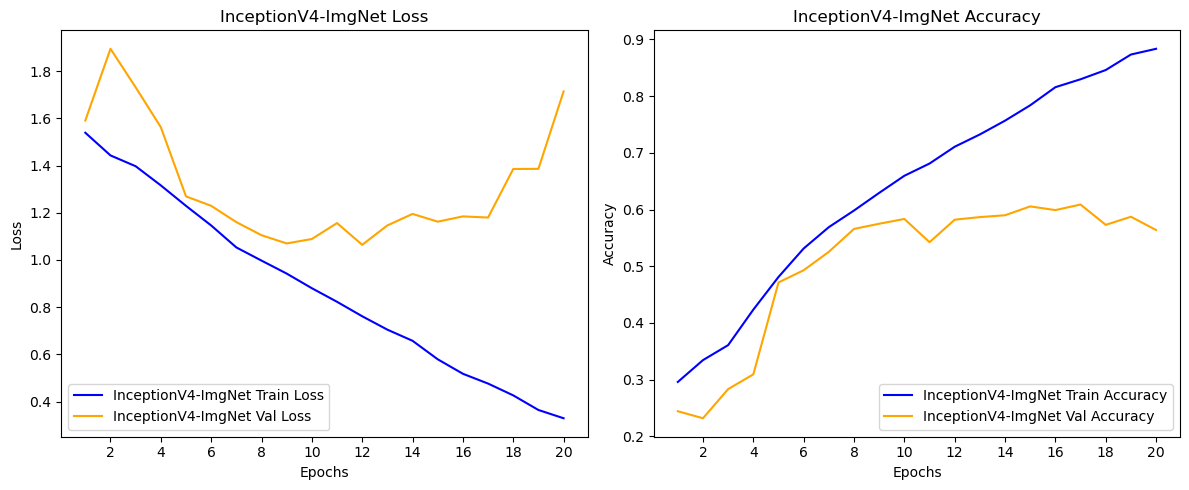

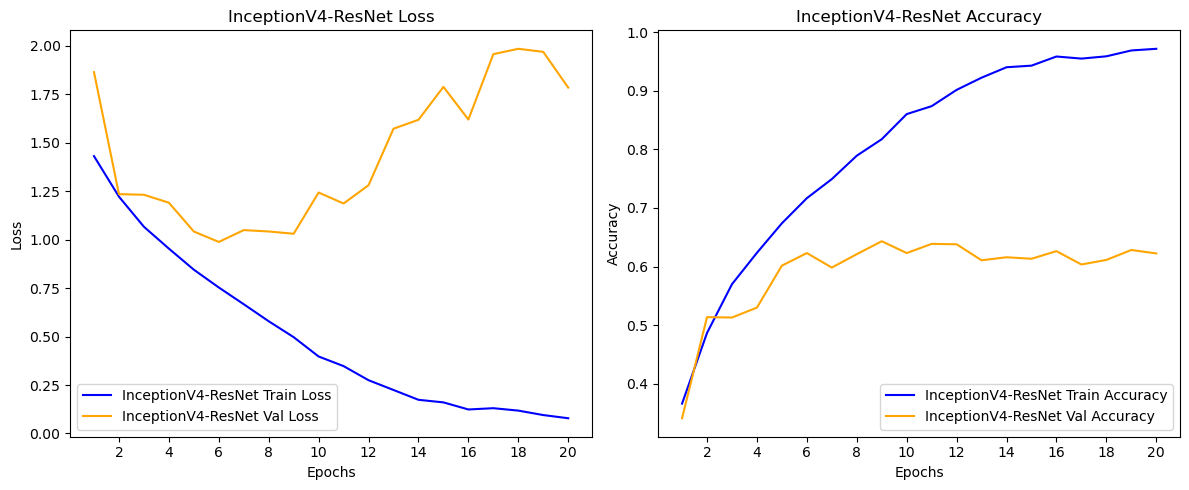

In [81]:
# Function to plot loss and accuracy
def plot_loss_and_accuracy(model_history, model_name):
    fig, axs = plt.subplots(1, 2, figsize=(12, 5)) 

    # Plot Training and Validation Loss
    axs[0].plot(model_history['Epoch'], model_history['Train Loss'], label=f'{model_name} Train Loss', color='blue')
    axs[0].plot(model_history['Epoch'], model_history['Val Loss'], label=f'{model_name} Val Loss', color='orange', linestyle='-')
    axs[0].set_xlabel('Epochs')
    axs[0].set_ylabel('Loss')
    axs[0].set_title(f'{model_name} Loss')
    axs[0].legend(loc='lower left')
    axs[0].set_xticks(np.arange(min(model_history['Epoch'])+1, max(model_history['Epoch'])+1, 2)) 

    # Plot Training and Validation Accuracy
    axs[1].plot(model_history['Epoch'], model_history['Train Acc'], label=f'{model_name} Train Accuracy', color='blue')
    axs[1].plot(model_history['Epoch'], model_history['Val Acc'], label=f'{model_name} Val Accuracy', color='orange', linestyle='-')
    axs[1].set_xlabel('Epochs')
    axs[1].set_ylabel('Accuracy')
    axs[1].set_title(f'{model_name} Accuracy')
    axs[1].legend(loc='lower right')
    axs[1].set_xticks(np.arange(min(model_history['Epoch'])+1, max(model_history['Epoch'])+1, 2))  
    plt.tight_layout()
    plt.show()

# Plot loss and accuracy for all models
plot_loss_and_accuracy(cnn_history, 'CNN')
plot_loss_and_accuracy(efficientnet_history, 'EfficientNet')
plot_loss_and_accuracy(inceptionv3_history, 'InceptionV3')
plot_loss_and_accuracy(inceptionv4_ImgNet_history, 'InceptionV4-ImgNet')
plot_loss_and_accuracy(inceptionv4_ResNet_history, 'InceptionV4-ResNet')

Accuracy Curves Comparison

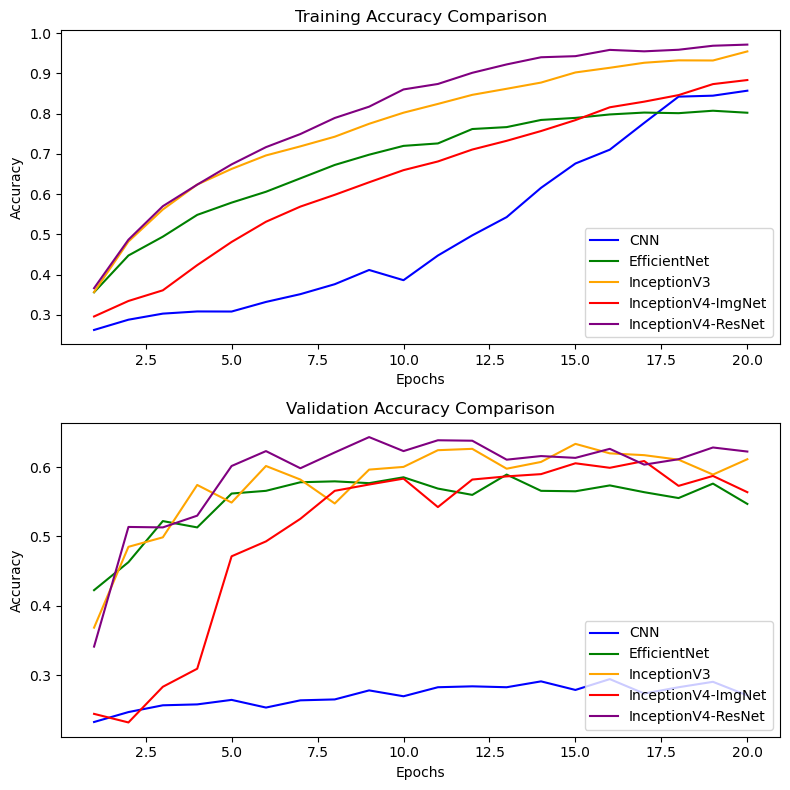

In [82]:
# All models' training and validation accuracy
model_histories = {
    'CNN': (cnn_history, 'blue'),
    'EfficientNet': (efficientnet_history, 'green'),
    'InceptionV3': (inceptionv3_history, 'orange'),
    'InceptionV4-ImgNet': (inceptionv4_ImgNet_history, 'red'),
    'InceptionV4-ResNet': (inceptionv4_ResNet_history, 'purple')
}

# Create subplots for accuracy
fig, axs = plt.subplots(2, 1, figsize=(8, 8))

# Plot Training and Validation Accuracy
for label, (history, color) in model_histories.items():
    axs[0].plot(history['Epoch'], history['Train Acc'], label=label, color=color, linestyle='-')
    axs[1].plot(history['Epoch'], history['Val Acc'], label=label, color=color, linestyle='-')

# Set titles and labels
axs[0].set_title('Training Accuracy Comparison')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Accuracy')
axs[0].legend(loc='lower right')

axs[1].set_title('Validation Accuracy Comparison')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Accuracy')
axs[1].legend(loc='lower right')

plt.tight_layout()
plt.show()

Loss Curves Comparison

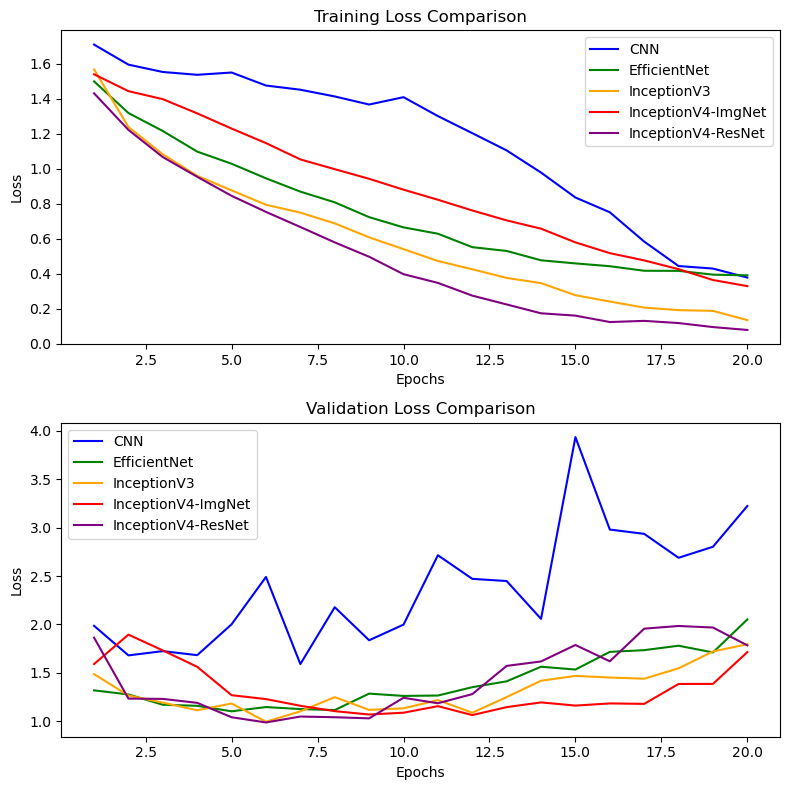

In [83]:
# All models' training and validation loss
fig, axs = plt.subplots(2, 1, figsize=(8, 8))

# Plot Training and Validation Loss
for label, (history, color) in model_histories.items():
    history = history[history['Epoch'] != 'Total Time']
    axs[0].plot(history['Epoch'], history['Train Loss'], label=label, color=color, linestyle='-')  
    axs[1].plot(history['Epoch'], history['Val Loss'], label=label, color=color, linestyle='-') 

axs[0].set_title('Training Loss Comparison')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Loss')
axs[0].legend(loc='upper right')

axs[1].set_title('Validation Loss Comparison')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Loss')
axs[1].legend(loc='upper left')

plt.tight_layout()
plt.show()